In [1]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\F}{\mathcal{F}}$

$\newcommand{\tg}{\mathrm{tg}}$
$\newcommand{\ctg}{\mathrm{ctg}}$
$\newcommand{\arctg}{\mathrm{arctg}}$
$\newcommand{\cov}{\mathrm{cov}}$
$\newcommand{\argmax}{\mathrm{argmax}}$
$\newcommand{\argmin}{\mathrm{argmin}}$

$\newcommand{\condit}{\thinspace\rvert\thinspace}$

$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\b}{\mathbf{b}}$
$\newcommand{\a}{\mathbf{a}}$

In [470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [471]:
from ggplot import *

In [472]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [473]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [474]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace
from scipy.stats import rv_discrete

In [475]:
from timeit import default_timer as timer

In [476]:
from sympy.utilities.iterables import multiset_permutations

In [477]:
from copy import copy

In [478]:
import sys

# Print iterations progress
def printProgress(iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    """\n    Call in a loop to create terminal progress bar\n    @params:\n        iteration   - Required  : current iteration (Int)\n        total       - Required  : total iterations (Int)\n        prefix      - Optional  : prefix string (Str)\n        suffix      - Optional  : suffix string (Str)\n        decimals    - Optional  : positive number of decimals in percent complete (Int)\n        barLength   - Optional  : character length of bar (Int)\n    """
    formatStr       = "{0:." + str(decimals) + "f}"
    percents        = formatStr.format(100 * (iteration / float(total)))
    filledLength    = int(round(barLength * iteration / float(total)))
    bar             = '█' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

### Markov model

Markov model is defined by:
* Initial probability distribution for states $\pi$
* Transition probabilities $A(\x,\x^{\prime})=\{\a_{ij}\}$, where $\a_{ij}=\pr(\x^{\prime}=S_i\condit \x = S_j)$

**Markov property:**
* Dependence only on the last event (not all the history):
$$\displaystyle{\pr(\x_t=S_{j_t}\condit \x_{t-1}=S_{j_{t-1}},\dots,\x_1=S_{j_1})=\pr(\x_t=S_{j_t}\condit \x_{t-1}=S_{j_{t-1}})}$$

### Hidden Markov Model

**Hidden markov Model specification**
* $\x_t$ - hidden state
* $\y_{1:t}=(y_1,\ldots,y_t)$ - observations in moments $1,\ldots,t$
* $\pi(\x_1)$ - initial state probabilities array
* $\b_k(y_t) = \pr(y_t=O\condit \x_t=k)$ - emission probability
* $\a_{ij}=\pr(\x_t=S_j\condit \x_{t-1}=S_i)$ - transition probability
* $\pr(\x_t,\y_{1:t})$ - joint probability

**Model definition:** 
* Model $\displaystyle{\mathcal{M}\left(\pi, A, B \right)}$
* Alphabet of states: $S_1,\ldots,S_N$
* Alphabet of observations: $O_1,\ldots,O_M$
* Initial state probabilities: $\pi=(\pi_1,\ldots,\pi_N)$
* Transition matrix: $A=\left(a_{ij}\right)_{i,j=1}^N\in\R^{N\times N}$
* Emission matrix: $B=\left(b_i(O_j)\right)_{i=1,j=1}^{N, M}\in\R^{N\times M}$

**Model assumptions**
* **Markov property:** $\displaystyle{\pr(\x_t\condit \x_{1:t-1})=\pr(\x_t\condit \x_{t-1})}$
* **Independence assumption:** $\displaystyle{\pr(\y_t\condit \y_{1:t-1},\x_{1:t})=\pr(\y_t\condit \x_t)}$

**Three problems of HMM**
* Find the probability of observed data conditioned on the model $\mathcal{M}$
* Given the data (observations) and the model $\mathcal{M}$, find the most probable sequence od states
* Given the data (observations) estimate the model $\mathcal{M}$ parameters

**The First Problem: find the probability of observed data conditioned on the model $\mathcal{M}$**

**Special probabilities** for the first problem

* **Forward probabilities:** $\displaystyle{\alpha_t(\x_t=i)=\alpha_t(i)=\pr(\x_t=i, \y_{1:t})}$ - the probability of arriving to state $i$ at the time $t$ emitting the observations up to time $t$.
* **Backward probabilities:** $\displaystyle{\beta_t(\x_t=i)=\pr(\y_{t+1:T} \condit \x_t=i)}$ - the probability of emitting the remaining sequence from $t+1$ until $T$ after being at the hidden state $\x_t=i$ at time $t$.

**Probability chain rule:**
$$\displaystyle{\pr\left(A_n,\ldots,A_1\right)=\pr\left(A_n\condit A_{n-1},\ldots,A_1\right)\cdot\pr\left(A_{n-1},\ldots,A_1\right)}$$

**FORWARD ALGORITHM**

Goal: solve decoding problem. Algorithm computes the joint probability $\pr(\x_t,\y_{1:t})$
* Start with definition $$\displaystyle{\alpha_t(\x_t)=\pr(\x_t,\y_{1:t})=\sum_{\x_{t-1}}\pr(\x_t,\x_{t-1},\y_{1:t-1})}$$
* Apply chain rule to the summands: $$\displaystyle{\alpha_t(\x_t)=\sum_{\x_{t-1}}\pr(\y_t\condit \x_t, \x_{t-1}, \y_{1:1-t-1})\pr(\x_t\condit \x_{t-1},\y_{1:t-1})\pr(\x_{t-1},\y_{1:t-1})}$$
* Due to conditional independence the last expression simplifies to: $$\displaystyle{\alpha_t(\x_t)=\underbrace
{\pr(\y_t\condit \x_t)}_{\b_{\x_t}(\y_t)}\sum_{\x_{t-1}}\underbrace{\pr(\x_t\condit \x_{t-1})}_{\a(\x_{t-1},\x_t)}\alpha_{t-1}(\x_{t-1})}$$
* **ALGORITHM**:
    * **Initialization:** $\displaystyle{\alpha_1(i)=\pi_i\b_i(\y_1)}$, $1\leq i \leq N$
    * **Induction:** for $t=2,\ldots,T$
    $$\displaystyle{\alpha_t(j)=\b_j(\y_t)\sum_{i=1}^N\alpha_{t-1}(i)\a_{ij}}, \quad 1\leq j \leq N$$
    * **Termination:** return $\pr(\y_{1:t})=\sum_{i=1}^N\alpha_T(i)$

**Implementation of Forward algorithm**
```python
def _forward(self, y):
        # number of observations
        T = len(y)
        # trellis for forward probabilities
        alpha = np.zeros(self.N*T).reshape(self.N, T)
        # scaling term
        self.c = np.zeros(T)
        # initialization
        pi = self._init_state_dist().pk
        e = [self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)]
        self.e = e
        alpha[:,0] = pi*e
        self.c[0] = 1./np.sum(alpha[:, 0])
        alpha[:, 0] = alpha[:, 0]*self.c[0]
        for t in range(1, T):
            for j in range(self.N):
                a = np.array([self._transition_dist(i).pmf(j) for i in np.arange(self.N)]).T
                alpha[j,t] = np.dot(alpha[:, t-1], a)*self._emission_dist(j).pmf(int(y[t]))
            self.c[t] = 1./np.sum(alpha[:, t])
            alpha[:, t] = alpha[:, t]*self.c[t]
        self.alpha = alpha
        alpha = np.divide(alpha, np.cumprod(self.c))
        return np.sum(alpha[:, T-1])
```

**Scaling problem**

The *scaling term* in the code above addresses the underflow problem while performing computation over small values. Multiplying a big amount of probabilities can cause the problem, that estimated values go to zero very fast.

The common approach is:
* **Initialization:**
    * $\alpha^{\prime}_1(i)=\alpha_1(i)$;
    * $c_1=\left(\sum_{i=1}^N\alpha^{\prime}_1(i)\right)^{-1}$
    * $\hat{\alpha}_1(i)=c_1\alpha^{\prime}_1(i)$
* **Induction:**
    * $\displaystyle{\alpha^{\prime}_t(j)=\b_j(\y_t)\sum_{i=1}^N\hat{\alpha}_{t-1}(i)\a_{ij}}$, $1\leq j \leq N$
    * $c_t=\left(\sum_{i=1}^N\alpha^{\prime}_t(i)\right)^{-1}$
    * $\hat{\alpha}_t(i)=c_t\alpha^{\prime}_t(i)$
* **Termination:**
    * $\displaystyle{\hat{\alpha}_t(i)=\alpha_t(i)\prod_{\tau=1}^tc_{\tau}=\alpha_t(i)\mathbf{C}_t}$

**BACKWARD ALGORITHM**

* Start with the definition $$\displaystyle{\beta_t(\x_t=i)=\pr(\y_{t+1:T}\condit \x_t=i)=\sum_{j}\pr(\x_{t+1}=j,\y_{t+1:T}\condit \x_t=i)}$$
* Apply chain rule: $$\displaystyle{\pr(\x_{t+1}=j,\y_{t+1:T}\condit \x_t=i)=\pr(\y_{t+2:T},\y_{t+1},\x_{t+1}=j\condit \x_t=i)=\\=\pr(\y_{t+2:T}\condit \y_{t+1},\x_{t+1}=j, \x_t=i)\pr(\y_{t+1} \condit \x_{t+1}=j,\x_t=i)\pr(\x_{t+1}=j\condit \x_t=i)}$$
* Due to conditional independence the above expression simplifies to: $$\displaystyle{\pr(\y_{t+2:T}\condit \x_{t+1}=j)\pr(\y_{t+1}\condit \x_{t+1}=j)\pr(\x_{t+1}=j\condit \x_t=i)}$$
* From the definition of backward probabilities follows, that: $$\displaystyle{\pr(\y_{t+2:T}\condit \x_{t+1}=j)=\beta_{t+1}(\x_{t+1}=j)}$$
* we obtain recursion for backward probabilities: $$\displaystyle{\beta_t(\x_t=i)=\sum_{j}\beta_{t+1}(\x_{t+1}=j)\pr(\y_{t+1}\condit \x_{t+1}=j)\pr(\x_{t+1}=j\condit \x_t=i)}$$
* recursion in terms of transition and emission probabilities: $$\displaystyle{\beta_t(\x_t=i)=\sum_{j}\beta_{t+1}(\x_{t+1}=j)\b_j(\y_{t+1})\a_{ij}}$$
* **ALGORITHM**
    * **Initialization:** $\displaystyle{\beta_T(i)=1}$, $1\leq i \leq N$
    * **Induction:** for $t=T-1,\ldots,1$
        * $\displaystyle{\beta_t(i)=\sum_{j=1}^N\a_{ij}\b_j(\y_{t+1})\beta_{t+1}(j)}$
    * **Termination:** $\displaystyle{\pr(\y_{1:T})=\sum_{i=1}^N\pi_i\b_i(\y_1)\beta_1(i)}$

**Implementation of backward algorithm**
```python
def _backward(self, y):
        # number of observations
        T = len(y)
        # trellis for forward probabilities
        beta = np.zeros(self.N*T).reshape(self.N, T)
        # initialization
        beta[:, T-1] = np.ones(self.N)
        beta[:, T-1] = beta[:, T-1]*self.c[T-1]
        for t in range(T-2, -1, -1):
            for i in range(self.N):
                a = np.array([self._transition_dist(i).pmf(j)*self._emission_dist(j).pmf(int(y[t+1])) for j in np.arange(self.N)]).T
                beta[i, t] = np.dot(beta[:, t+1], a)
            beta[:,t] = beta[:,t]*self.c[t]
        self.beta = beta
        
        beta = np.divide(beta, np.cumprod(self.c[::-1])[::-1])
        pi = self._init_state_dist().pk
        b = np.array([self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)])
        return np.sum(pi*b*beta[:, 0])
```

**Scaling problem**

* **Initialization:** 
    * $\beta^{\prime}_T(i)=1$
    * $\hat{\beta}_T(i)=c_T\beta^{\prime}_T(i)$
* **Induction:**
    * $\displaystyle{\beta^{\prime}_t(i)=\sum_{j=1}^N\a_{ij}\b_j(\y_{t+1})\hat{\beta}_{t+1}(j)}$
    * $\hat{\beta}_t(i)=c_t\beta^{\prime}_t(i)$
* **Termination:**
    * $\displaystyle{\hat{\beta}_t(i)=\beta_t(i)\prod_{\tau=t}^Tc_{\tau}=\beta_t(i)\mathbf{D}_t}$
    
**Note, that**
* $\displaystyle{\mathbf{C}_t\cdot\mathbf{D}_{t+1}=\mathbf{C}_T}$

**The Second Problem: given the data (observations) and the model $\mathcal{M}$, find the most probable sequence od states**

**Special probabilities** for the second problem
* Auxiliary variables: 
    * maximum probability to reach $S_i$ on the step $t$ over all paths with given observations: $$\displaystyle{\delta_t(i)=\underset{\x_1,\ldots,\x_{t-1}}{\max}\pr\left(\x_t=i,\y_{1:t}\condit \mathcal{M}\right)}$$
    * array of arguments of $\delta_t(i)$: $\psi_t(i)$

**Viterbi algorithm**

* **Initialization:** $\delta_1(i)=\pi_i\b_i(\y_1)$, $\psi_1(i)=0$, $1\leq i \leq N$
* **Induction:** for $t=2,\ldots,T$
    * $\displaystyle{\delta_t(j)=\underset{i}{\max}\left(\delta_{t-1}(i)\a_{ij}\right)\b_j(\y_t)}$
    * $\displaystyle{\psi_t(j)=\underset{i}{\argmax}\left(\delta_{t-1}(i)\a_{ij}\right)}$, $1\leq j \leq N$
* **Termination:**
    * $\displaystyle{\Delta^*=\underset{i}{\max}\delta_T(i)}$
    * $\displaystyle{\x^*_t=\underset{i}{\argmax}\delta_T(i)}$
* **Traceback:** for $t=T-1,\ldots,1$
    * $\x^*_t=\psi(\x^*_{t+1})$
    * $\x^*_{1:T}=\left(\x_1^*,\ldots,\x_T^*\right)$

**Implementation of the Viterbi algorithm**
```python
def viterbi(self, y):
        # number of observations
        T = len(y)
        x = np.zeros(T)
        # trellis for Viterbi algorithm
        delta = np.zeros(self.N*T).reshape(self.N, T)
        psi = np.zeros(self.N*T).reshape(self.N, T)
        # initialization
        pi = np.log(self._init_state_dist().pk)
        b = np.log(np.array([self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)]))
        delta[:,0] = - pi - b
        for t in range(1, T):
            for j in range(self.N):
                a = np.log(np.array([self._transition_dist(i).pmf(j) for i in np.arange(self.N)])).T
                delta[j, t] = np.min(delta[:, t-1] - a) - np.log(self._emission_dist(j).pmf(int(y[t])))
                psi[j, t] = np.argmin(delta[:, t-1] - a)
        # finally
        D = np.min(delta[:, T-1])
        x[T-1] = np.argmin(delta[:, T-1])
        # trace back
        for t in range(T-2, -1, -1):
            x[t] = psi[int(x[t+1]), t+1]
        
        self.state_trace = x
        
        self.delta = delta
        self.psi = psi
        
        return x
```

**Scaling problem**

**Viterbi algorithm in log scale**

* **Initialization:** $\delta_1(i)=-\log \pi_i-\log\b_i(\y_1)$, $\psi_1(i)=0$, $1\leq i \leq N$
* **Induction:** for $t=2,\ldots,T$
    * $\displaystyle{\delta_t(j)=\underset{i}{\min}\left(\delta_{t-1}(i)-\log\a_{ij}\right)-\log\b_j(\y_t)}$
    * $\displaystyle{\psi_t(j)=\underset{i}{\argmin}\left(\delta_{t-1}(i)-\log\a_{ij}\right)}$, $1\leq j \leq N$
* **Termination:**
    * $\displaystyle{\Delta^*=\underset{i}{\min}\delta_T(i)}$
    * $\displaystyle{\x^*_t=\underset{i}{\argmin}\delta_T(i)}$
* **Traceback:** for $t=T-1,\ldots,1$
    * $\x^*_t=\psi(\x^*_{t+1})$
    * $\x^*_{1:T}=\left(\x_1^*,\ldots,\x_T^*\right)$

**The Third Problem: given the data (observations) estimate the model $\mathcal{M}$ parameters**

**Auxiliary variables**
* $\displaystyle{\gamma_t(i)=\pr(\x_t=i\condit \y_{1:T}, \mathcal{M})}$ the conditional probability to visit state $S_i$ on the $t$-th step given observations $\y_{1:T}$ and model $\mathcal{M}$
    * In terms of $\alpha_t(i)$ and $\beta_t(i)$ we can get the next expression (from the Bayes rule): $\displaystyle{\gamma_t(i)=\frac{\pr(\x_t=i, \y_{1:T}\condit \mathcal{M})}{\pr\left(\y_{1:T\condit \mathcal{M}}\right)}=\frac{\alpha_t(i)\beta_t(i)}{\pr\left(\y_{1:T\condit \mathcal{M}}\right)}=\frac{\alpha_t(i)\beta_t(i)}{\sum_{j=1}^N\alpha_t(j)\beta_t(j)}}$
* The probability to be in the state $S_i$ at time $t$ and in the state $S_j$ at time $t+1$ given observations: $$\displaystyle{\xi_t(i,j)=\pr\left(\x_{t-1}=i,\x_t=j\condit \y_{1:T}\right)}$$
    * From the Bayes law: $$\displaystyle{\xi_t(i,j)=\frac{\pr\left(\x_{t-1}=i,\x_t=j, \y_{1:T}\condit\mathcal{M}\right)}{\pr\left(\y_{1:T}\condit \mathcal{M}\right)}=\frac{\pr\left(\x_{t-1}=i,\y_{1:t-1}\condit \mathcal{M}\right)\pr\left(\x_t=j,\y_{t:T}\condit \x_{t-1}=i,\mathcal{M}\right)}{\pr\left(\y_{1:T}\condit \mathcal{M}\right)}=\frac{\alpha_{t-1}(i)\pr\left(\x_t=j,\y_t\condit \x_{t-1},\mathcal{M}\right)\pr\left(\y_{t+1:T}\condit \x_t=j,\mathcal{M}\right)}{\pr\left(\y_{1:T}\condit \mathcal{M}\right)}=\frac{\alpha_{t-1}(i)\a_{ij}\b_j(\y_t)\beta_t(j)}{\pr\left(\y_{1:T}\condit \mathcal{M}\right)}}$$
* Connection between $\gamma_t(i)$ and $\xi_t(i,j)$: $$\displaystyle{\gamma_t(i)=\sum_{j=1}^N\xi_t(i,j)}$$

**Baum-Welch algorithm**

* **Initial-state probabilities** - estimate via expected frequency of state $S_i$ on the step 1:
    * $\displaystyle{\hat{\pi}_i=\gamma_1(i)}$, for $1\leq i \leq N$;
* **State-transition probabilities** - estimate via expected number of transitions from $S_i$ to $S_j$ divided by the expected number of transitions from the state $S_i$:
    * $\displaystyle{\hat{\a}_{ij}=\frac{\sum_{t=2}^T\xi_t(i,j)}{\sum_{t=2}^T\gamma_t(i)}}$, for $1\leq i,j\leq N$;
* **Output probabilities** - estimate via expected number of visits to $S_j$ and observations $O_k$ divided by the expected number of visits to $S_j$:
    * $\displaystyle{\hat{\b}_j(k)=\frac{\sum_{t=1}^T\rvert_{\y_t=k}\gamma_t(j)}{\sum_{t=1}^T\gamma_t(j)}}$, for $1\leq j\leq N$, $1\leq k \leq M$
    
On each step we get $\displaystyle{\pr\left(\y_{1:T}\condit\mathcal{\hat{M}}\right)\geq \pr\left(\y_{1:T}\condit\mathcal{M}\right)}$, but this doesn't guarantee a **global** maximum.

**Implementation of the Baum-Welch algorithm**
```python
def baum_welch(self, y, max_iter=25):
        converged = False
        T = len(y)
        # initialize model
        self.A = np.random.uniform(size=self.N*self.N).reshape(self.N, self.N)
        self.A = (self.A.T/np.sum(self.A, axis=1)).T
        
        self.E = np.random.uniform(size=self.N*self.M).reshape(self.N, self.M)
        self.E = (self.E.T/np.sum(self.E, axis=1)).T
        self.a0 = np.random.uniform(size=self.N)
        self.a0 = self.a0/np.sum(self.a0)
        self.cost = []
        self.delta = []
        # initialization
        emission_nominator = np.zeros((self.N, self.M))
        xi = np.zeros((self.N, self.N))
        
        progress = 0
        printProgress(progress, max_iter, prefix = 'Progress:', suffix = 'Complete', barLength = 50)
        for step in range(max_iter):
            evidence, _ = self._forward(y), self._backward(y)
            gamma = np.multiply(self.alpha, self.beta)
            gamma = np.divide(gamma, self.c)
            self.gamma = gamma
            for j in range(self.N):
                for k in range(self.M):
                    emission_nominator[j, k] = np.sum([gamma[j, t]*(y[t] == k) for t in range(T)])
            
            
            for i in range(self.N):
                for j in range(self.N):
                    xi[i, j] = np.sum([self.alpha[i, t - 1]\
                                       *self.beta[j, t]\
                                       *self._transition_dist(i).pmf(j)\
                                       *self._emission_dist(j).pmf(int(y[t]))
                                       for t in range(1, T)])                
            
            E = (emission_nominator.T/np.sum(gamma, axis=1)).T
            A = (xi/np.sum(gamma[:,1:], axis=1)).T
            a0 = gamma[:, 0]
            
            self.cost.append(evidence)
            self.delta.append(np.max(np.hstack((np.max(abs(self.a0 - a0)), np.max(abs(A - self.A)), np.max(abs(E - self.E))))))
            
            if np.max(abs(self.a0 - a0)) < self.eps and \
                   np.max(abs(A - self.A)) < self.eps and \
                   np.max(abs(E - self.E)) < self.eps:
                converged = True
            
            self.a0 = a0
            self.A = A
            self.E = E
            
            if converged:
                progress = max_iter
                conv_step = step
                step = max_iter + 1
            else:
                progress+=1
            printProgress(progress, max_iter, prefix = 'Progress:', suffix = 'Complete', barLength = 50)
            if converged:
                print('Converged on step: ', conv_step)
                break
        self.cost = np.array(self.cost)
        self.delta = np.array(self.delta)
        
        return self.viterbi(y)
```

**Scaling problem**

* **State-transition probabilities:**
    * $\displaystyle{\hat{\a}_{ij}=\frac{\sum_{t=2}^T\xi_t(i,j)}{\sum_{t=2}^T\gamma_t(i)}=\frac{\sum_{t=2}^T\hat{\alpha}_{t-1}(i)\a_{ij}\b_j(\y_{t})\hat{\beta}_{t}(j)}{\sum_{t=2}^T\hat{\alpha}_t(i)\hat{\beta}_t(i)/c_t}}$;
* **Output probabilities:** 
    * $\displaystyle{\hat{\b}_j(k)=\frac{\sum_{t=1}^T\rvert_{\y_t=k}\gamma_t(j)}{\sum_{t=1}^T\gamma_t(j)}=\frac{\sum_{t=1}^T\rvert_{\y_t=k}\hat{\alpha}_t(j)\hat{\beta}_t(j)/c_t}{\sum_{t=1}^T\hat{\alpha}_t(j)\hat{\beta}_t(j)/c_t}}$

In [495]:
class HiddenMarkovModel(object):
    """
    Hidden Markov Model class 
    
    Parameters:
    -----------
    
    - S: Number of states
    - O: Emission alphabet capacity
    - A: Transition matrix
    - E: Emission matrix
    - a0: Initial state probabilities 
    """
    def __init__(self, A, E, a0, eps = 0.0001):
        # number of states
        self.N = A.shape[0]
        # observations capacity
        self.M = E.shape[1]
        self.A = A
        self.E = E
        self.a0 = a0
        self.eps = eps
        
    def _init_state_dist(self):
        return rv_discrete(name='init_state_dist', values=(np.arange(self.N), self.a0))
        
    def _transition_dist(self, state):
        return  rv_discrete(name='transition_dist', values=(np.arange(self.N), self.A[state, :]))
    
    def _emission_dist(self, state):
        return  rv_discrete(name='emission_dist', values=(np.arange(self.M), self.E[state, :]))
                
    def sample(self, n):
        # initialize states and observations history
        X = np.zeros(n)
        y = np.zeros(n)
        # initial state
        X[0] = self._init_state_dist().rvs()
        y[0] = self._emission_dist(int(X[0])).rvs()
        for i in range(1, n):
            X[i] = self._transition_dist(int(X[i-1])).rvs()
            y[i] = self._emission_dist(int(X[i])).rvs()
        
        return X, y
    
    def _forward(self, y):
        # number of observations
        T = len(y)
        # trellis for forward probabilities
        alpha = np.zeros(self.N*T).reshape(self.N, T)
        # scaling term
        self.c = np.zeros(T)
        # initialization
        pi = self._init_state_dist().pk
        e = [self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)]
        alpha[:,0] = pi*e
        self.c[0] = 1./np.sum(alpha[:, 0])
        alpha[:, 0] = alpha[:, 0]*self.c[0]
        for t in range(1, T):
            for j in range(self.N):
                a = np.array([self._transition_dist(i).pmf(j) for i in np.arange(self.N)]).T
                alpha[j,t] = np.dot(alpha[:, t-1], a)*self._emission_dist(j).pmf(int(y[t]))
            self.c[t] = 1./np.sum(alpha[:, t])
            alpha[:, t] = alpha[:, t]*self.c[t]
        self.alpha = alpha
        alpha = np.divide(alpha, np.cumprod(self.c))
        return np.sum(alpha[:, T-1])
    
    def _backward(self, y):
        # number of observations
        T = len(y)
        # trellis for forward probabilities
        beta = np.zeros(self.N*T).reshape(self.N, T)
        # initialization
        beta[:, T-1] = np.ones(self.N)
        beta[:, T-1] = beta[:, T-1]*self.c[T-1]
        for t in range(T-2, -1, -1):
            for i in range(self.N):
                a = np.array([self._transition_dist(i).pmf(j)*self._emission_dist(j).pmf(int(y[t+1])) for j in np.arange(self.N)]).T
                beta[i, t] = np.dot(beta[:, t+1], a)
            beta[:,t] = beta[:,t]*self.c[t]
        self.beta = beta
        
        beta = np.divide(beta, np.cumprod(self.c[::-1])[::-1])
        pi = self._init_state_dist().pk
        b = np.array([self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)])
        return np.sum(pi*b*beta[:, 0])
    
    def viterbi(self, y):
        # number of observations
        T = len(y)
        x = np.zeros(T)
        # trellis for Viterbi algorithm
        delta = np.zeros(self.N*T).reshape(self.N, T)
        psi = np.zeros(self.N*T).reshape(self.N, T)
        # initialization
        pi = np.log(self._init_state_dist().pk)
        b = np.log(np.array([self._emission_dist(i).pmf(int(y[0])) for i in np.arange(self.N)]))
        delta[:,0] = - pi - b
        for t in range(1, T):
            for j in range(self.N):
                a = np.log(np.array([self._transition_dist(i).pmf(j) for i in np.arange(self.N)])).T
                delta[j, t] = np.min(delta[:, t-1] - a) - np.log(self._emission_dist(j).pmf(int(y[t])))
                psi[j, t] = np.argmin(delta[:, t-1] - a)
        # finally
        D = np.min(delta[:, T-1])
        x[T-1] = np.argmin(delta[:, T-1])
        # trace back
        for t in range(T-2, -1, -1):
            x[t] = psi[int(x[t+1]), t+1]
        return x
    
    def baum_welch(self, y, max_iter=25):
        converged = False
        T = len(y)
        # initialize model
        self.A = np.random.uniform(size=self.N*self.N).reshape(self.N, self.N)
        self.A = (self.A.T/np.sum(self.A, axis=1)).T
        
        self.E = np.random.uniform(size=self.N*self.M).reshape(self.N, self.M)
        self.E = (self.E.T/np.sum(self.E, axis=1)).T
        self.a0 = np.random.uniform(size=self.N)
        self.a0 = self.a0/np.sum(self.a0)
        self.cost = []
        self.delta = []
        # initialization
        emission_nominator = np.zeros((self.N, self.M))
        xi = np.zeros((self.N, self.N))
        
        progress = 0
        printProgress(progress, max_iter, prefix = 'Progress:', suffix = 'Complete', barLength = 50)
        for step in range(max_iter):
            evidence, _ = self._forward(y), self._backward(y)
            gamma = np.multiply(self.alpha, self.beta)
            gamma = np.divide(gamma, self.c)
            self.gamma = gamma
            for j in range(self.N):
                for k in range(self.M):
                    emission_nominator[j, k] = np.sum([gamma[j, t]*(y[t] == k) for t in range(T)])
            
            
            for i in range(self.N):
                for j in range(self.N):
                    xi[i, j] = np.sum([self.alpha[i, t - 1]\
                                       *self.beta[j, t]\
                                       *self._transition_dist(i).pmf(j)\
                                       *self._emission_dist(j).pmf(int(y[t]))
                                       for t in range(1, T)])                
            
            E = (emission_nominator.T/np.sum(gamma, axis=1)).T
            A = (xi/np.sum(gamma[:,1:], axis=1)).T
            a0 = gamma[:, 0]
            
            self.cost.append(evidence)
            self.delta.append(np.max(np.hstack((np.max(abs(self.a0 - a0)), np.max(abs(A - self.A)), np.max(abs(E - self.E))))))
            
            if np.max(abs(self.a0 - a0)) < self.eps and \
                   np.max(abs(A - self.A)) < self.eps and \
                   np.max(abs(E - self.E)) < self.eps:
                converged = True
            
            self.a0 = a0
            self.A = A
            self.E = E
            
            if converged:
                progress = max_iter
                conv_step = step
                step = max_iter + 1
            else:
                progress+=1
            printProgress(progress, max_iter, prefix = 'Progress:', suffix = 'Complete', barLength = 50)
            if converged:
                print('Converged on step: ', conv_step)
                break
        self.cost = np.array(self.cost)
        self.delta = np.array(self.delta)
        return self.viterbi(y)

**Define some true parameters for the HMM.**

In [496]:
a0 = np.array([0.5, 0.5])

B = np.array([[0.9, 0.1],
              [0.1, 0.1],
              [0.0, 0.8]])

A = np.array([[0.85, 0.15],
              [0.12, 0.88]])

In [497]:
hmm = HiddenMarkovModel(A, B.T, a0, eps=0.0001)

**Sample from HMM**

White and red colored bands define true states.

In [498]:
X, y = hmm.sample(n=50)

In [499]:
centers = np.where(X==0)[0]
lb = centers - 0.5
rb = centers + 0.5
spans = np.vstack((lb,rb)).T
c1 = spans.T[0][1:]
c2 = spans.T[1][:-1]
z1 = np.insert(c1[c1!=c2], 0, spans.T[0][0])
z2 = np.append(c2[c1!=c2], spans.T[1][-1])
spans = np.vstack((z1,z2)).T

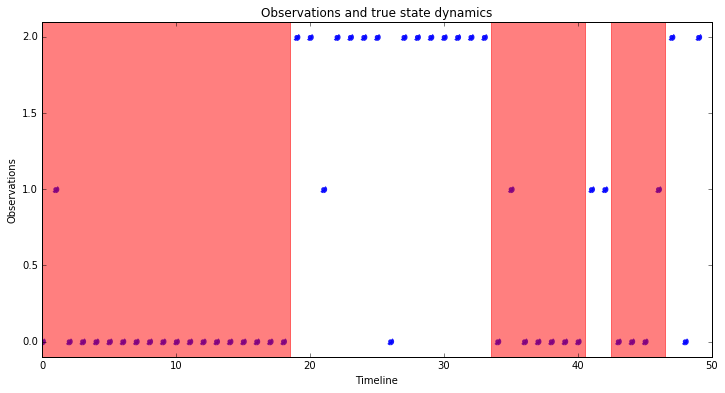

In [500]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.scatter(np.arange(50), y, color='blue', lw=3, alpha=0.9, linestyle='dashed')
for span in spans:
    ax.axvspan(span[0], span[1], alpha=0.5, color='red')
plt.ylim(-0.1, 2.1)
plt.ylabel('Observations')
plt.xlabel('Timeline')
plt.title('Observations and true state dynamics')
plt.xlim(0,50);

**Estimate observations probability via forward and backward algorithms.**

In [501]:
print('Probability of observed data (Forward algorithm): ',hmm._forward(y))

Probability of observed data (Forward algorithm):  1.58785780311e-16


In [502]:
print('Probability of observed data (Backward algorithm): ' ,hmm._backward(y))

Probability of observed data (Backward algorithm):  1.58785780311e-16


**Use Viterbi algorithm to estimate the most probable state sequence.**

In [503]:
X_fit = hmm.viterbi(y)

In [504]:
np.mean(X==X_fit)

0.93999999999999995

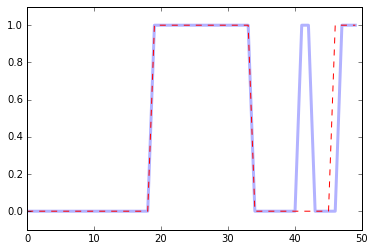

In [505]:
plt.plot(X, color='blue', lw=3, alpha=0.3)
plt.plot(X_fit, color='red', linestyle='dashed')
plt.ylim(-0.1, 1.1);

**Given only the observations, estimate HMM parameters via Baum-Welch algorithm.**

In [506]:
X_fit = hmm.baum_welch(y, max_iter=150)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Converged on step:  10


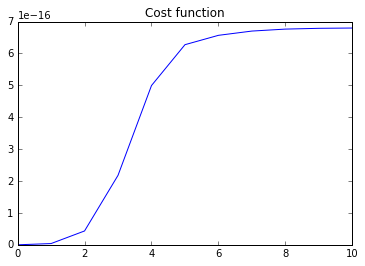

In [507]:
plt.plot(hmm.cost)
plt.title('Cost function');

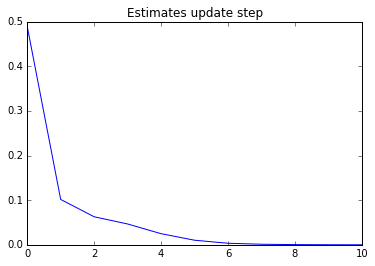

In [508]:
plt.plot(hmm.delta.T)
plt.title('Estimates update step');

In [509]:
centers = np.where(X==0)[0]
lb = centers - 0.5
rb = centers + 0.5
spans = np.vstack((lb,rb)).T
c1 = spans.T[0][1:]
c2 = spans.T[1][:-1]
z1 = np.insert(c1[c1!=c2], 0, spans.T[0][0])
z2 = np.append(c2[c1!=c2], spans.T[1][-1])
spans = np.vstack((z1,z2)).T

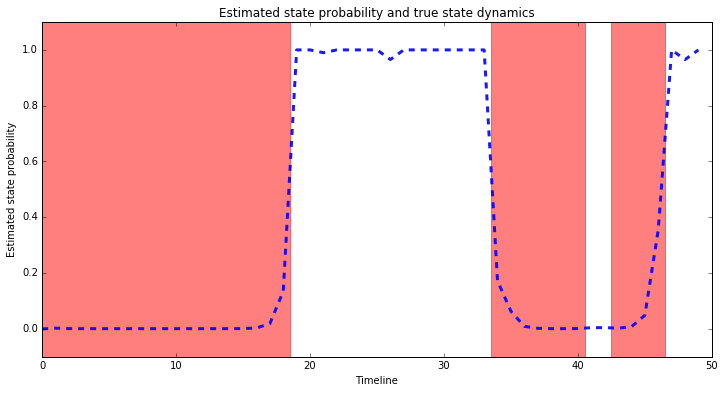

In [510]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.plot(hmm.gamma[1], color='blue', lw=3, alpha=0.9, linestyle='dashed')
for span in spans:
    ax.axvspan(span[0], span[1], alpha=0.5, color='red')
plt.ylim(-0.1, 1.1)
plt.ylabel('Estimated state probability')
plt.xlabel('Timeline')
plt.title('Estimated state probability and true state dynamics')
plt.xlim(0,50);